In [0]:
# Import needed libraries
import requests as r
import pandas as pd
import json
from google.colab import files
import io
import seaborn as sns
import matplotlib.pyplot as plt

**Load Data**

In [2]:
# upload file
uploaded = files.upload()

Saving ASAshootertable.csv to ASAshootertable.csv


In [3]:
# create dataframe
df = pd.read_csv(io.BytesIO(uploaded['ASAshootertable.csv']))
df.head()

,First,Last,Player,Team,Season,Min,Pos,Shots,SoT,Dist,Solo,G,xG,xPlace,G-xG,KeyP,Dist.key,A,xA,A-xA,xG+xA,PA,xPA,xG/shot,xA/pass,G-xG/shot,A-xA/pass,Comp ($K),Team/96,Min/96,Pos/96,Shots/96,SoT/96,G/96,xG/96,xPlace/96,G-xG/96,KeyP/96,A/96,xA/96,A-xA/96,xG+xA/96,PA/96,xPA/96,Comp ($K)/96,extreme1,extreme2,plotnames
0,Carlos,Vela,Carlos Vela,LAFC,2019,2931.0,Wing,159,70,21.118648,0.327044,34,25.690,5.265164,8.309906,93,14.791340,10,11.405555,-1.405555,37.095649,17.815947,15.156144,0.161573,0.122640,0.052264,-0.015113,6300.0,LAFC,2931.0,Wing,5.207779,2.292733,1.113613,0.841436,0.172452,0.272177,3.046059,0.327533,0.373570,-0.046037,1.215006,0.583532,0.496414,6300.0,549,549,Vela
1,Zlatan,Ibrahimovic,Zlatan Ibrahimovic,LAG,2019,2807.0,F,150,64,17.352484,0.220000,30,23.531,3.662435,6.468637,44,17.355105,7,5.814181,1.185819,29.345544,18.589200,16.113333,0.156876,0.132140,0.043124,0.026950,7200.0,LAG,2807.0,F,5.130032,2.188814,1.026006,0.804778,0.125256,0.221229,1.504809,0.239401,0.198846,0.040555,1.003624,0.635755,0.551079,7200.0,548,548,Ibrahimovic
2,Josef,Martinez,Josef Martinez,ATL,2019,2757.0,F,116,48,15.316682,0.198276,27,20.777,2.154571,6.223420,30,21.558719,3,2.805758,0.194242,23.582338,14.757617,11.421248,0.179108,0.093525,0.053650,0.006475,3058.0,ATL,2757.0,F,4.039173,1.671382,0.940152,0.723450,0.075023,0.216702,1.044614,0.104461,0.097698,0.006764,0.821148,0.513867,0.397693,3058.0,547,547,Martinez
3,Mauro,Manotas,Mauro Manotas,HOU,2019,2707.0,F,92,29,18.058701,0.217391,13,14.559,-3.604112,-1.559107,41,19.841404,7,5.715574,1.284426,20.274681,10.333282,9.848429,0.158251,0.139404,-0.016947,0.031327,1245.0,HOU,2707.0,F,3.262652,1.028445,0.461027,0.516319,-0.127815,-0.055292,1.454008,0.248245,0.202695,0.045550,0.719013,0.366456,0.349261,1245.0,545,541,Manotas
4,Kei,Kamara,Kei Kamara,COL,2019,2739.0,F,95,44,14.685907,0.284211,14,17.261,3.809555,-3.260985,22,23.005605,1,2.253452,-1.253452,19.514437,6.694456,9.598462,0.181695,0.102430,-0.034326,-0.056975,750.0,COL,2739.0,F,3.329682,1.542169,0.490690,0.604985,0.133522,-0.114295,0.771084,0.035049,0.078982,-0.043933,0.683967,0.234636,0.336419,750.0,546,542,Kamara


**Light Cleanup**

In [4]:
# Set index to player name
df.set_index("Player")

,First,Last,Team,Season,Min,Pos,Shots,SoT,Dist,Solo,G,xG,xPlace,G-xG,KeyP,Dist.key,A,xA,A-xA,xG+xA,PA,xPA,xG/shot,xA/pass,G-xG/shot,A-xA/pass,Comp ($K),Team/96,Min/96,Pos/96,Shots/96,SoT/96,G/96,xG/96,xPlace/96,G-xG/96,KeyP/96,A/96,xA/96,A-xA/96,xG+xA/96,PA/96,xPA/96,Comp ($K)/96,extreme1,extreme2,plotnames
Player,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Carlos Vela,Carlos,Vela,LAFC,2019,2931.0,Wing,159,70,21.118648,0.327044,34,25.690,5.265164,8.309906,93,14.791340,10,11.405555,-1.405555,37.095649,17.815947,15.156144,0.161573,0.122640,0.052264,-0.015113,6300.0,LAFC,2931.0,Wing,5.207779,2.292733,1.113613,0.841436,0.172452,0.272177,3.046059,0.327533,0.373570,-0.046037,1.215006,0.583532,0.496414,6300.0,549,549,Vela
Zlatan Ibrahimovic,Zlatan,Ibrahimovic,LAG,2019,2807.0,F,150,64,17.352484,0.220000,30,23.531,3.662435,6.468637,44,17.355105,7,5.814181,1.185819,29.345544,18.589200,16.113333,0.156876,0.132140,0.043124,0.026950,7200.0,LAG,2807.0,F,5.130032,2.188814,1.026006,0.804778,0.125256,0.221229,1.504809,0.239401,0.198846,0.040555,1.003624,0.635755,0.551079,7200.0,548,548,Ibrahimovic
Josef Martinez,Josef,Martinez,ATL,2019,2757.0,F,116,48,15.316682,0.198276,27,20.777,2.154571,6.223420,30,21.558719,3,2.805758,0.194242,23.582338,14.757617,11.421248,0.179108,0.093525,0.053650,0.006475,3058.0,ATL,2757.0,F,4.039173,1.671382,0.940152,0.723450,0.075023,0.216702,1.044614,0.104461,0.097698,0.006764,0.821148,0.513867,0.397693,3058.0,547,547,Martinez
Mauro Manotas,Mauro,Manotas,HOU,2019,2707.0,F,92,29,18.058701,0.217391,13,14.559,-3.604112,-1.559107,41,19.841404,7,5.715574,1.284426,20.274681,10.333282,9.848429,0.158251,0.139404,-0.016947,0.031327,1245.0,HOU,2707.0,F,3.262652,1.028445,0.461027,0.516319,-0.127815,-0.055292,1.454008,0.248245,0.202695,0.045550,0.719013,0.366456,0.349261,1245.0,545,541,Manotas
Kei Kamara,Kei,Kamara,COL,2019,2739.0,F,95,44,14.685907,0.284211,14,17.261,3.809555,-3.260985,22,23.005605,1,2.253452,-1.253452,19.514437,6.694456,9.598462,0.181695,0.102430,-0.034326,-0.056975,750.0,COL,2739.0,F,3.329682,1.542169,0.490690,0.604985,0.133522,-0.114295,0.771084,0.035049,0.078982,-0.043933,0.683967,0.234636,0.336419,750.0,546,542,Kamara
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Servando Carrasco,Servando,Carrasco,LAG,2019,456.0,CDM,0,0,NaN,NaN,0,0.000,0.000000,0.000000,1,27.461864,0,0.018067,-0.018067,0.018067,0.000000,0.000000,0.000000,0.018067,0.000000,-0.018067,70.0,LAG,456.0,CDM,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.210526,0.000000,0.003803,-0.003803,0.003803,0.000000,0.000000,70.0,21,48,Carrasco
Justin Portillo,Justin,Portillo,RSL,2019,202.0,CDM,1,0,34.471068,1.000000,0,0.017,-0.017085,-0.017085,0,NaN,0,0.000000,0.000000,0.017085,0.000000,0.004745,0.017085,0.000000,-0.017085,0.000000,70.0,RSL,202.0,CDM,0.475248,0.000000,0.000000,0.008120,-0.008120,-0.008120,0.000000,0.000000,0.000000,0.000000,0.008120,0.000000,0.002255,70.0,27,20,Portillo
Shaft Brewer,Shaft,Brewer,LAFC,2019,101.0,FB/WB,1,0,33.039982,1.000000,0,0.012,-0.012013,-0.012013,0,NaN,0,0.000000,0.000000,0.012013,0.000000,0.022284,0.012013,0.000000,-0.012013,0.000000,82.0,LAFC,101.0,FB/WB,0.950495,0.000000,0.000000,0.011419,-0.011419,-0.011419,0.000000,0.000000,0.000000,0.000000,0.011419,0.000000,0.021181,82.0,26,66,Brewer


In [49]:
# Filter for players who scored goals
scored = df["G"] > 0
goal_scorerers = df[scored]
goal_scorerers.head()
goal_scorerers = goal_scorerers.sort_values("G", ascending=False)
goal_scorerers.head(15)

,First,Last,Player,Team,Season,Min,Pos,Shots,SoT,Dist,Solo,G,xG,xPlace,G-xG,KeyP,Dist.key,A,xA,A-xA,xG+xA,PA,xPA,xG/shot,xA/pass,G-xG/shot,A-xA/pass,Comp ($K),Team/96,Min/96,Pos/96,Shots/96,SoT/96,G/96,xG/96,xPlace/96,G-xG/96,KeyP/96,A/96,xA/96,A-xA/96,xG+xA/96,PA/96,xPA/96,Comp ($K)/96,extreme1,extreme2,plotnames
0,Carlos,Vela,Carlos Vela,LAFC,2019,2931.0,Wing,159,70,21.118648,0.327044,34,25.690,5.265164,8.309906,93,14.791340,10,11.405555,-1.405555,37.095649,17.815947,15.156144,0.161573,0.122640,0.052264,-0.015113,6300.0,LAFC,2931.0,Wing,5.207779,2.292733,1.113613,0.841436,0.172452,0.272177,3.046059,0.327533,0.373570,-0.046037,1.215006,0.583532,0.496414,6300.0,549,549,Vela
1,Zlatan,Ibrahimovic,Zlatan Ibrahimovic,LAG,2019,2807.0,F,150,64,17.352484,0.220000,30,23.531,3.662435,6.468637,44,17.355105,7,5.814181,1.185819,29.345544,18.589200,16.113333,0.156876,0.132140,0.043124,0.026950,7200.0,LAG,2807.0,F,5.130032,2.188814,1.026006,0.804778,0.125256,0.221229,1.504809,0.239401,0.198846,0.040555,1.003624,0.635755,0.551079,7200.0,548,548,Ibrahimovic
2,Josef,Martinez,Josef Martinez,ATL,2019,2757.0,F,116,48,15.316682,0.198276,27,20.777,2.154571,6.223420,30,21.558719,3,2.805758,0.194242,23.582338,14.757617,11.421248,0.179108,0.093525,0.053650,0.006475,3058.0,ATL,2757.0,F,4.039173,1.671382,0.940152,0.723450,0.075023,0.216702,1.044614,0.104461,0.097698,0.006764,0.821148,0.513867,0.397693,3058.0,547,547,Martinez
7,Diego,Rossi,Diego Rossi,LAFC,2019,3078.0,Wing,108,48,19.528997,0.185185,16,11.025,2.364740,4.974559,49,19.265830,6,7.716931,-1.716931,18.742372,8.174645,5.214880,0.102087,0.157488,0.046061,-0.035039,1052.0,LAFC,3078.0,Wing,3.368421,1.497076,0.499025,0.343873,0.073754,0.155152,1.528265,0.187135,0.240684,-0.053550,0.584557,0.254960,0.162647,1052.0,536,546,Rossi
26,Kacper,Przybylko,Kacper Przybylko,PHI,2019,2417.0,F,81,37,15.816173,0.148148,15,11.673,1.099629,3.326621,27,19.797807,4,3.005073,0.994927,14.678452,11.432264,8.019560,0.144116,0.111299,0.041069,0.036849,277.0,PHI,2417.0,F,3.217211,1.469590,0.595780,0.463651,0.043676,0.132129,1.072404,0.158875,0.119357,0.039517,0.583008,0.454074,0.318526,277.0,537,545,Przybylko
15,Chris,Wondolowski,Chris Wondolowski,SJE,2019,2111.0,F,79,32,12.884960,0.113924,15,14.310,1.178709,0.689802,24,22.807234,2,2.016797,-0.016797,16.326995,8.252427,7.427490,0.181142,0.084033,0.008732,-0.000700,800.0,SJE,2111.0,F,3.592610,1.455234,0.682141,0.650772,0.053603,0.031369,1.091426,0.090952,0.091716,-0.000764,0.742488,0.375288,0.337773,800.0,544,544,Wondolowski
50,Heber,Heber,Heber,NYC,2019,1693.0,F,55,26,16.101564,0.236364,15,8.517,1.587683,6.483242,25,20.878991,3,2.482258,0.517742,10.999016,7.857903,5.215436,0.154850,0.099290,0.117877,0.020710,789.0,NYC,1693.0,F,3.118724,1.474306,0.850561,0.482935,0.090028,0.367626,1.417602,0.170112,0.140754,0.029358,0.623689,0.445575,0.295736,789.0,521,543,Heber
4,Kei,Kamara,Kei Kamara,COL,2019,2739.0,F,95,44,14.685907,0.284211,14,17.261,3.809555,-3.260985,22,23.005605,1,2.253452,-1.253452,19.514437,6.694456,9.598462,0.181695,0.102430,-0.034326,-0.056975,750.0,COL,2739.0,F,3.329682,1.542169,0.490690,0.604985,0.133522,-0.114295,0.771084,0.035049,0.078982,-0.043933,0.683967,0.234636,0.336419,750.0,546,542,Kamara
25,Gyasi,Zardes,Gyasi Zardes,CLB,2019,2657.0,F,61,26,12.454661,0.180328,13,12.843,0.756685,0.156997,28,21.862782,2,1.870862,0.129138,14.713865,7.935921,9.669458,0.210541,0.066816,0.002574,0.004612,1472.0,CLB,2657.0,F,2.203989,0.939405,0.469703,0.464030,0.027340,0.005672,1.011667,0.072262,0.067596,0.004666,0.531626,0.286733,0.349367,1472.0,541,540,Zardes
3,Mauro,Manotas,Mauro Manotas,HOU,2019,2707.0,F,92,29,18.058701,0.217391,13,14.559,-3.604112,-1.559107,41,19.841404,7,5.715574,1.284426,20.274681,10.333282,9.848429,0.158251,0.139404,-0.016947,0.031327,1245.0,HOU,2707.0,F,3.262652,1.028445,0.461027,0.516319,-0.127815,-0.055292,1.454008,0.248245,0.202695,0.045550,0.719013,0.366456,0.349261,1245.0,545,541,Manotas


**Exploratory Data Analysis**

In [6]:
# Info and Description
goal_scorerers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 0 to 520
Data columns (total 48 columns):
First           304 non-null object
Last            304 non-null object
Player          304 non-null object
Team            304 non-null object
Season          304 non-null int64
Min             302 non-null float64
Pos             304 non-null object
Shots           304 non-null int64
SoT             304 non-null int64
Dist            304 non-null float64
Solo            304 non-null float64
G               304 non-null int64
xG              304 non-null float64
xPlace          304 non-null float64
G-xG            304 non-null float64
KeyP            304 non-null int64
Dist.key        299 non-null float64
A               304 non-null int64
xA              304 non-null float64
A-xA            304 non-null float64
xG+xA           304 non-null float64
PA              304 non-null float64
xPA             304 non-null float64
xG/shot         304 non-null float64
xA/pass         304 non-

In [7]:
goal_scorerers.describe()

,Season,Min,Shots,SoT,Dist,Solo,G,xG,xPlace,G-xG,KeyP,Dist.key,A,xA,A-xA,xG+xA,PA,xPA,xG/shot,xA/pass,G-xG/shot,A-xA/pass,Comp ($K),Min/96,Shots/96,SoT/96,G/96,xG/96,xPlace/96,G-xG/96,KeyP/96,A/96,xA/96,A-xA/96,xG+xA/96,PA/96,xPA/96,Comp ($K)/96,extreme1,extreme2
count,304.0,302.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,299.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,286.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,284.000000,304.000000,304.00000
mean,2019.0,1771.341060,31.592105,11.266447,19.063095,0.244811,3.953947,3.614816,0.140100,0.339123,22.256579,20.012465,2.315789,2.291105,0.024685,5.905929,2.470912,2.320669,0.113862,0.102233,0.024922,-0.001891,675.888112,1771.341060,1.816820,0.677586,0.245200,0.213048,0.009403,0.032152,1.175101,0.121563,0.121997,-0.000434,0.335045,0.157640,0.137117,678.492958,380.733553,397.50000
std,0.0,846.085581,26.170387,10.442269,4.757382,0.143472,4.300340,3.712112,0.991488,1.712444,20.600874,4.326362,2.514436,2.136626,1.161916,5.206747,2.632824,2.345541,0.055324,0.041647,0.084826,0.096190,989.348434,846.085581,1.111331,0.493237,0.253956,0.165254,0.068555,0.192900,0.743443,0.112264,0.084911,0.072980,0.208959,0.210775,0.113674,992.213696,114.021094,87.90146
min,2019.0,31.000000,1.000000,1.000000,8.035919,0.000000,1.000000,0.109000,-3.604112,-5.928642,0.000000,9.409390,0.000000,0.000000,-2.831324,0.108749,0.001537,0.073198,0.032260,0.000000,-0.136951,-0.285438,56.000000,31.000000,0.160200,0.028951,0.028951,0.005804,-0.226511,-0.341626,0.000000,0.000000,0.000000,-0.317660,0.025223,0.000288,0.003012,56.000000,74.000000,246.00000
25%,2019.0,1050.000000,12.000000,4.000000,15.987016,0.142857,1.000000,1.306500,-0.447692,-0.543939,7.000000,17.632008,1.000000,0.700034,-0.663491,2.306231,0.669214,0.827820,0.076139,0.077294,-0.025193,-0.048347,165.250000,1050.000000,0.808215,0.243271,0.078940,0.076282,-0.025500,-0.035975,0.686615,0.031496,0.060518,-0.040078,0.159718,0.048454,0.049922,165.750000,310.750000,321.75000
50%,2019.0,1848.500000,23.000000,8.000000,19.010432,0.235294,2.000000,2.250500,0.071052,0.202332,18.000000,19.804046,2.000000,1.795948,-0.152116,4.239861,1.583434,1.475046,0.104794,0.097951,0.009226,-0.008279,400.000000,1848.500000,1.695964,0.610262,0.189541,0.178198,0.003432,0.011846,1.081177,0.095563,0.112440,-0.009202,0.319001,0.110853,0.107676,400.000000,396.500000,397.50000
75%,2019.0,2489.500000,44.750000,15.000000,22.538189,0.333333,5.000000,5.225000,0.600995,0.934230,30.000000,21.960135,3.000000,2.991880,0.625192,8.227425,3.376755,3.144444,0.141877,0.122529,0.052691,0.036350,727.500000,2489.500000,2.561383,0.980136,0.339223,0.321326,0.043136,0.076494,1.476923,0.192626,0.160292,0.039992,0.501534,0.214912,0.199268,732.500000,473.250000,473.25000
max,2019.0,3316.000000,159.000000,70.000000,31.631254,1.000000,34.000000,25.690000,5.265164,8.309906,125.000000,63.007928,13.000000,11.405555,5.460851,37.095649,18.589200,16.113333,0.438100,0.285438,0.657148,0.959436,7200.000000,3316.000000,6.193548,3.096774,3.096774,0.841436,0.321032,2.760004,4.270463,0.497878,0.388486,0.253520,1.215006,3.010604,0.672369,7200.000000,549.000000,549.00000


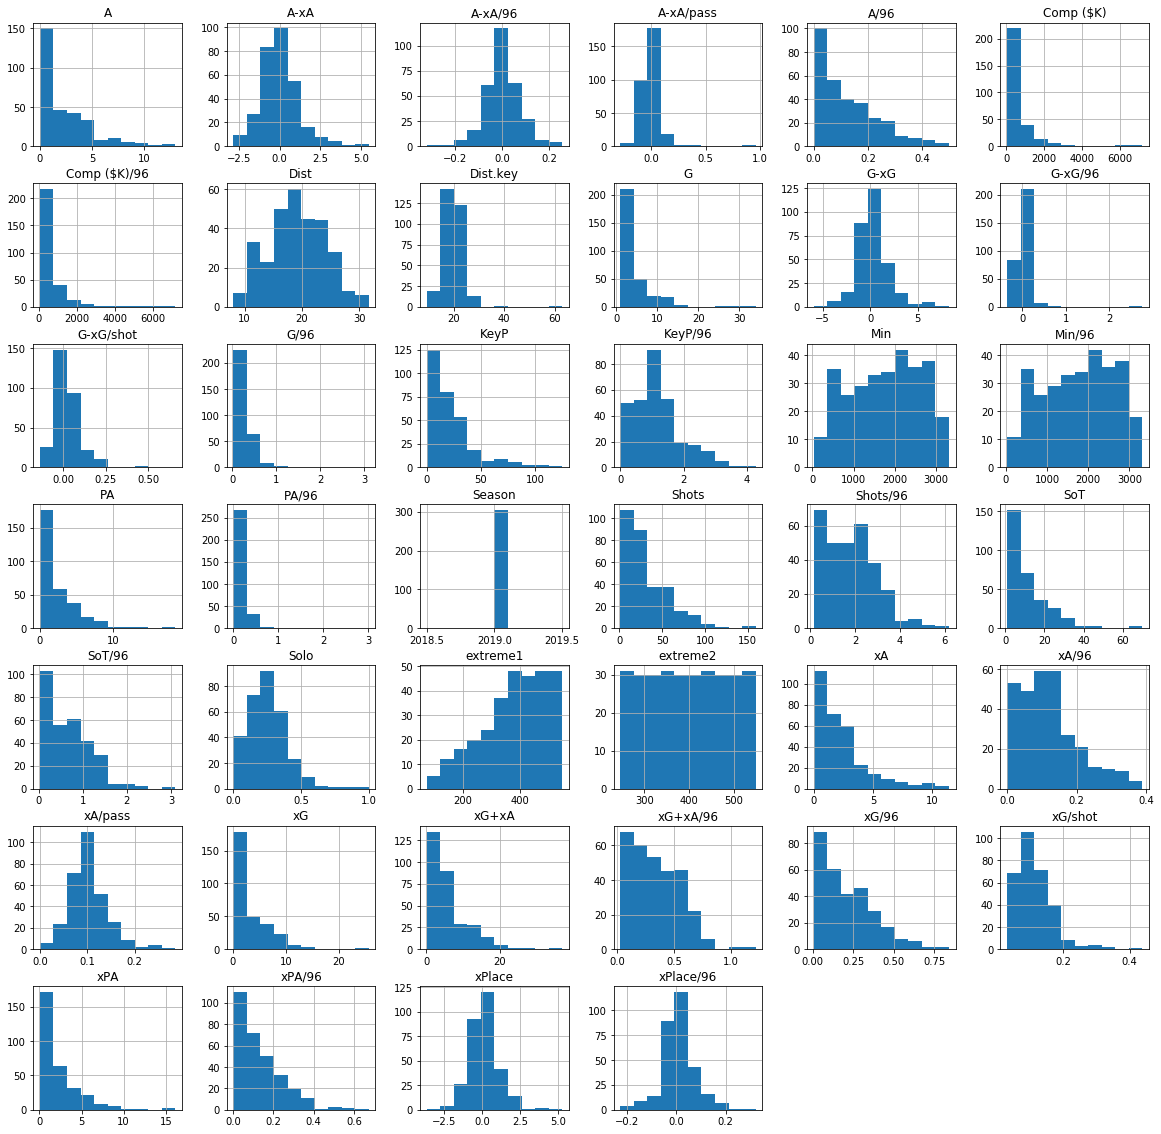

In [8]:
# Distribution of all attributes
goal_scorerers.hist(figsize=(20,20))
plt.show()

Text(0, 0.5, 'Percentage of Players')

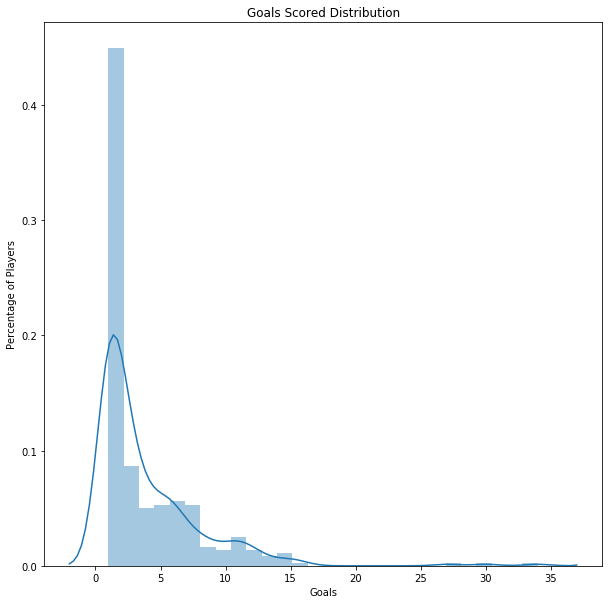

In [9]:
# Histograms of Goals Scored, Shots Taken
plt.figure(figsize=(10,10))
sns.distplot(goal_scorerers['G'])
plt.title('Goals Scored Distribution')
plt.xlabel('Goals')
plt.ylabel('Percentage of Players')

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0, 0.5, 'Percentage of Players')

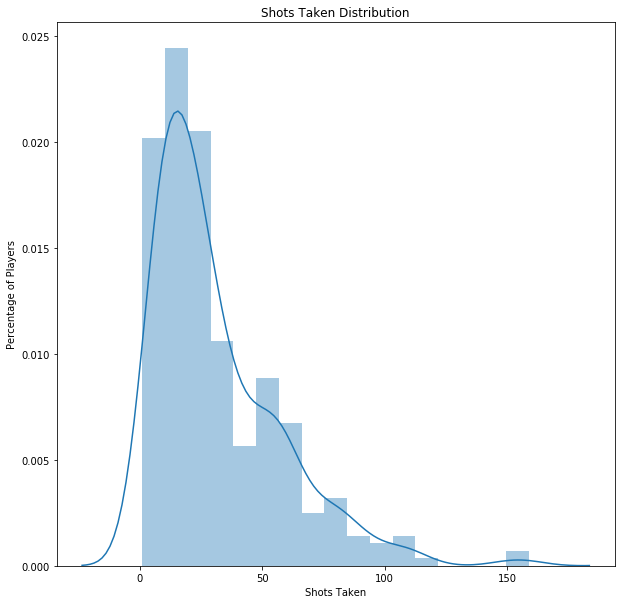

In [10]:
plt.figure(figsize=(10,10))
print(sns.distplot(goal_scorerers['Shots']))
plt.title('Shots Taken Distribution')
plt.xlabel('Shots Taken')
plt.ylabel('Percentage of Players')

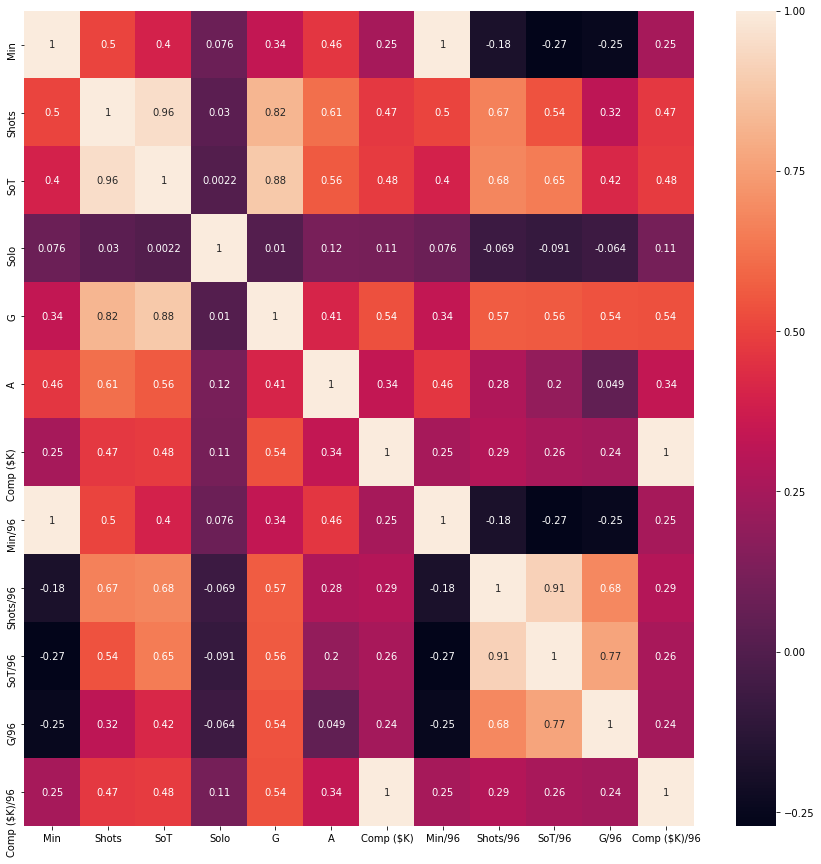

In [11]:
# Correlation between attributes
# Clean up df - remove unwanted columns for correlation analysis
goal_scorerers_cor = goal_scorerers.drop(['xG','xPlace', 'G-xG', 'KeyP', 'Dist.key', 'xA', 'A-xA', 'xPA', 'xG/shot', 'xA/pass', 'xG/96', 'xPlace/96', 'G-xG/96', 'xG+xA/96', 'PA/96', 'xPA/96', 'extreme1', 'extreme2', 'xA/96', 'A/96', 'KeyP/96', 'A-xA/pass', 'G-xG/shot', 'Season', 'Dist', 'xG+xA','PA','A-xA/96'], axis=1)
cor = goal_scorerers_cor.corr()

# Draw figure and heatmap
plt.figure(figsize=(15,15))
sns.heatmap(cor, annot=True)

Text(0, 0.5, 'Minutes Played')

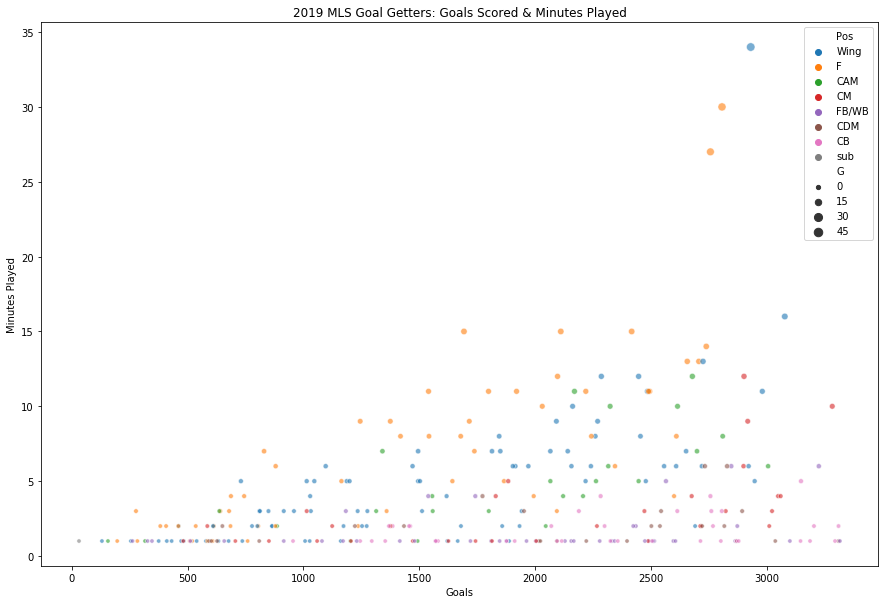

In [12]:
# Scatter plot showing minutes v goals
# Draw figure, scatterplot, title, & labels
plt.figure(figsize = (15,10))
sns.scatterplot(x='Min', y='G', hue='Pos', data=goal_scorerers, size='G', legend='brief', alpha=.6)
plt.title('2019 MLS Goal Getters: Goals Scored & Minutes Played')
plt.xlabel('Goals')
plt.ylabel('Minutes Played')

**Goals Scored by Position**

Text(0, 0.5, 'Goals')

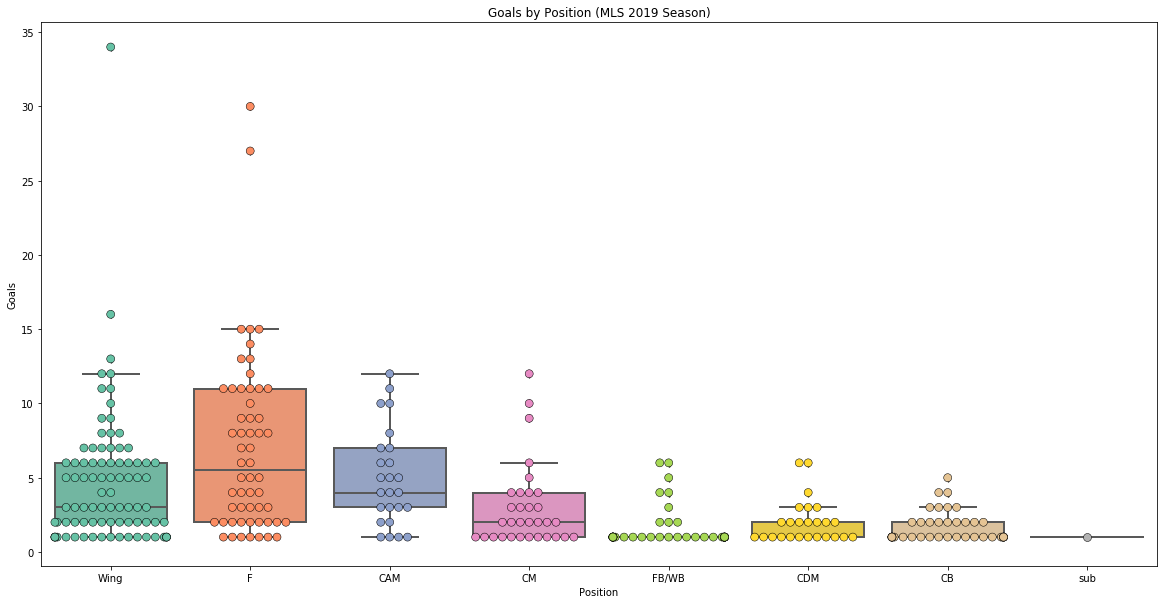

In [13]:
# Goals Scored by Position
plt.figure(figsize=(20, 10))
swarm = sns.swarmplot(x='Pos', y='G', data=goal_scorerers, palette='Set2', size=8, edgecolor='black', linewidth=.5)

# Add box plot
boxes = sns.boxplot(x='Pos', y='G', data=goal_scorerers, palette='Set2', linewidth=2)
plt.title('Goals by Position (MLS 2019 Season)')
plt.xlabel('Position')
plt.ylabel('Goals')

Text(0, 0.5, 'Goals')

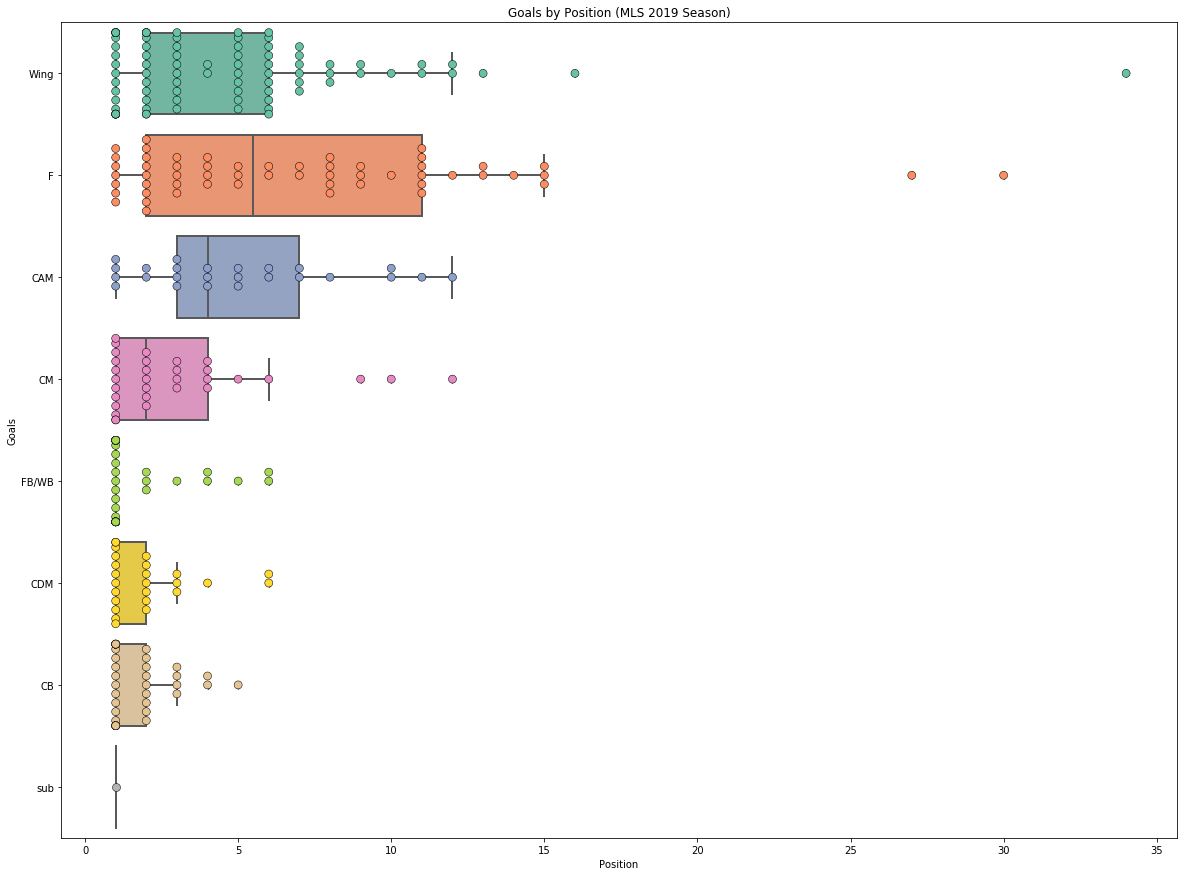

In [14]:
# Horizontal View 
# Goals Scored by Position
plt.figure(figsize=(20, 15))
swarm = sns.swarmplot(x='G', y='Pos', data=goal_scorerers, palette='Set2', size=8, edgecolor='black', linewidth=.5)

# Add box plot
boxes = sns.boxplot(x='G', y='Pos', data=goal_scorerers, palette='Set2', linewidth=2)
plt.title('Goals by Position (MLS 2019 Season)')
plt.xlabel('Position')
plt.ylabel('Goals')

Text(336.9714285714286, 0.5, 'Goals Scored')

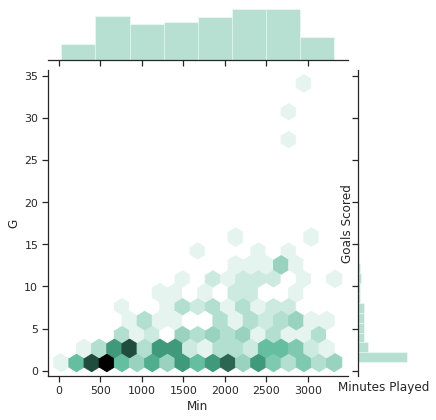

In [15]:
# Hexbin plot with marginal distributions
sns.set(style='ticks')
sns.jointplot(x='Min', y='G', data=goal_scorerers, kind='hex', color='#4CB391')
plt.xlabel('Minutes Played')
plt.ylabel('Goals Scored')

In [50]:
# Top 3, 5, 10 Goal Scorers
top3 = goal_scorerers.iloc[:3]
top5 = goal_scorerers.iloc[:5]
top10 = goal_scorerers.iloc[:10]
print(top3)
print(top5)
print(top10)

    First         Last              Player  ... extreme1  extreme2    plotnames
0  Carlos         Vela         Carlos Vela  ...      549       549         Vela
1  Zlatan  Ibrahimovic  Zlatan Ibrahimovic  ...      548       548  Ibrahimovic
2   Josef     Martinez      Josef Martinez  ...      547       547     Martinez

[3 rows x 48 columns]
     First         Last              Player  ... extreme1  extreme2    plotnames
0   Carlos         Vela         Carlos Vela  ...      549       549         Vela
1   Zlatan  Ibrahimovic  Zlatan Ibrahimovic  ...      548       548  Ibrahimovic
2    Josef     Martinez      Josef Martinez  ...      547       547     Martinez
7    Diego        Rossi         Diego Rossi  ...      536       546        Rossi
26  Kacper    Przybylko    Kacper Przybylko  ...      537       545    Przybylko

[5 rows x 48 columns]
     First         Last              Player  ... extreme1  extreme2    plotnames
0   Carlos         Vela         Carlos Vela  ...      549       549

Text(0.5, 0, 'Goals')

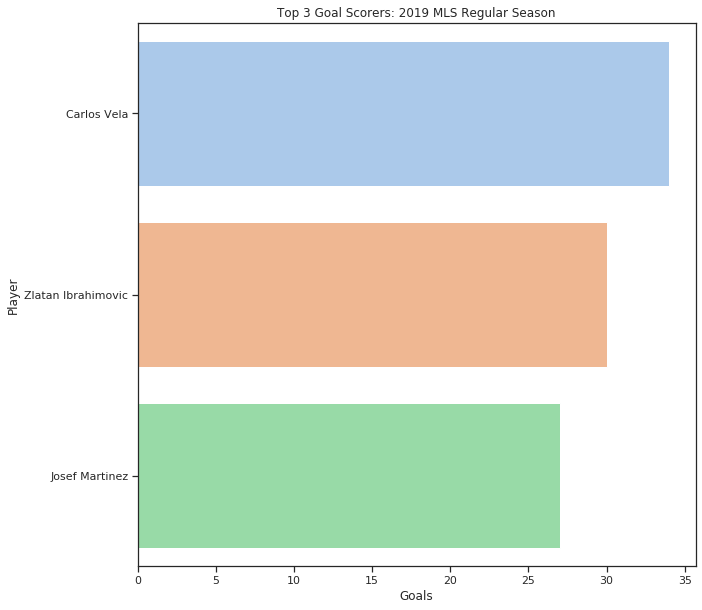

In [51]:
# Top 3 Goal Scorers as barplot
plt.figure(figsize=(10,10))
sns.barplot(x='G', y='Player', data=top3, palette='pastel')
plt.title('Top 3 Goal Scorers: 2019 MLS Regular Season')
plt.xlabel('Goals')

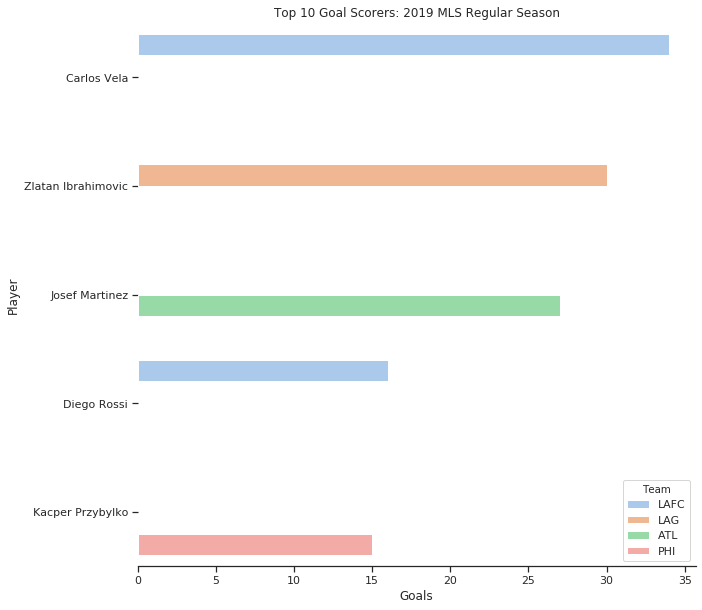

In [52]:
# Top 5 Goal Scorers
plt.figure(figsize=(10,10))
sns.barplot(x='G', y='Player', data=top5, hue='Team', palette='pastel', )
plt.title('Top 10 Goal Scorers: 2019 MLS Regular Season')
plt.xlabel('Goals')
sns.despine(left=True, bottom=False)

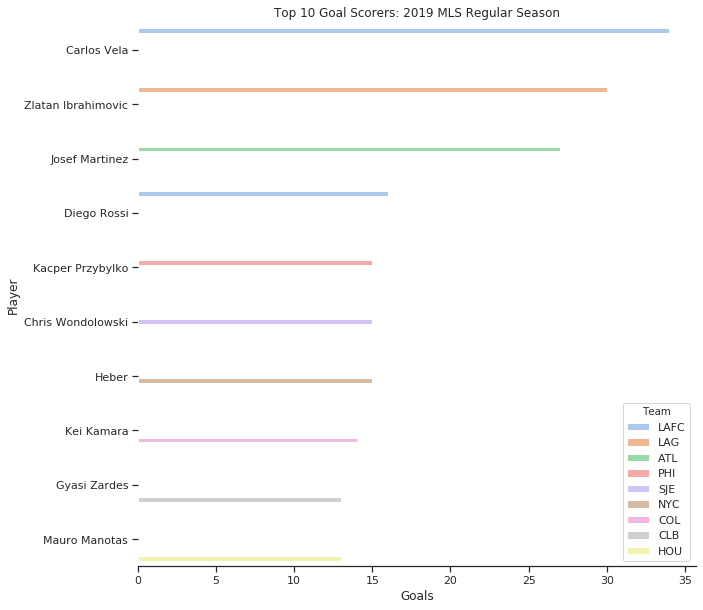

In [53]:
# Top 10 Goal Scorers
plt.figure(figsize=(10,10))
sns.barplot(x='G', y='Player', data=top10, hue='Team', palette='pastel', )
plt.title('Top 10 Goal Scorers: 2019 MLS Regular Season')
plt.xlabel('Goals')
sns.despine(left=True, bottom=False)

In [0]:
# TODOS: 
# Rename player position names to full name
# Rename columns to be more intuitive
# Change minutes to int or deal with nulls

In [0]:
# Source Data: https://www.americansocceranalysis.com/asa-xgoals, American Soccer Analysis
# Documentation used along the way:
# Scatterplots: https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot
# Swarmplots: https://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn.swarmplot
# Boxplots: https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot
# Barchart: https://seaborn.pydata.org/examples/grouped_barplot.html